# Setup and Obtaining Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from nba_api.stats.endpoints import leaguedashplayerclutch as cst

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'

In [2]:
df = cst.LeagueDashPlayerClutch().get_data_frames()
df = pd.DataFrame(df[0])
print(df.shape)

(454, 66)


# Filtering statistics

In [3]:
data = df[['PLAYER_NAME', 'FGM', 'FG_PCT']]
data = data[data['FGM'] > 10]

print(data.columns)

Index(['PLAYER_NAME', 'FGM', 'FG_PCT'], dtype='object')


# Outlier Detection

In [7]:
outliers = data[np.abs(stats.zscore(data[['FGM', 'FG_PCT']])) > 2]
outliers.shape

(12, 3)

# Graphing

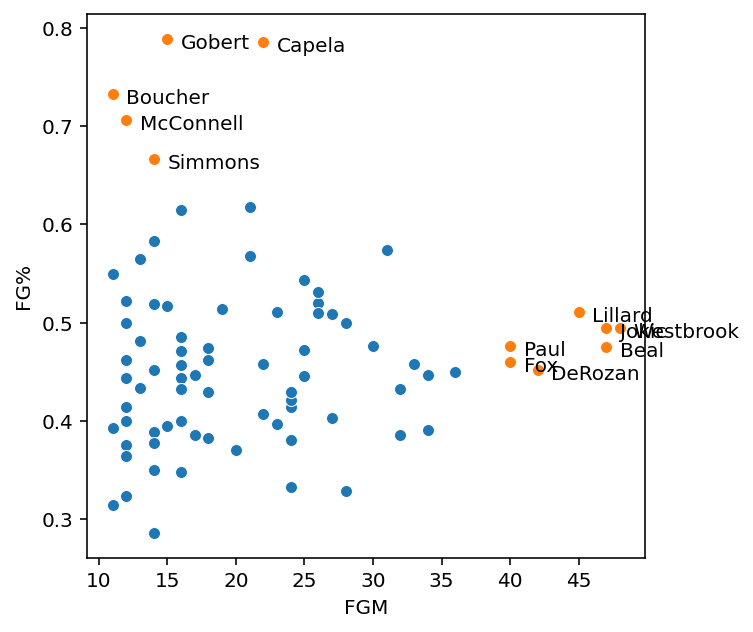

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlabel='FGM', ylabel='FG%')
abacate = (-1, 0.5)

sns.scatterplot(ax=ax, data=data, x='FGM', y='FG_PCT')
sns.scatterplot(ax=ax, data=outliers, x='FGM', y='FG_PCT')

for i in range(outliers.shape[0]):
    #outliers.sort_values("FGM", 0, inplace=True)
    x_pos = outliers["FGM"].iloc[i] + 1
    y_pos = outliers["FG_PCT"].iloc[i] - 0.01
    names = outliers['PLAYER_NAME'].iloc[i].split(" ")
    names[0] = names[0][0] + '.'
    last_names = names[1]#' '.join(names)
    ax.annotate(text=last_names, xy=(x_pos, y_pos), xycoords='data')

plt.savefig("output/clutch_shooting.png", dpi=300)